In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
%matplotlib nbagg

## Random walk:

In [2]:
G=nx.read_gpickle("../../data/airport/smaller_airportnet.pickle")

In [3]:
src='FRA'

<IPython.core.display.Javascript object>


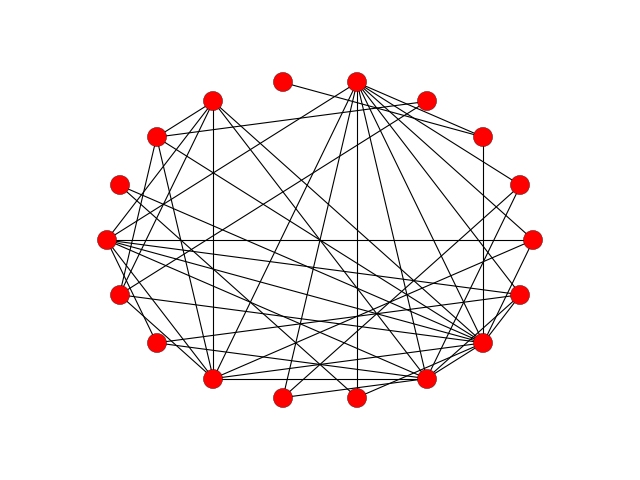

In [4]:
nx.draw(G, pos=nx.layout.circular_layout(G))

### Animate the random walk

<IPython.core.display.Javascript object>


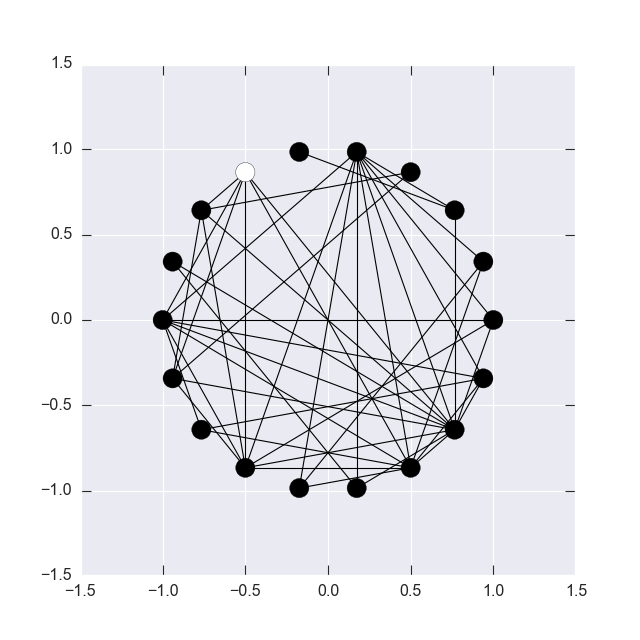

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

plt.ion()
G=nx.read_gpickle("../../data/airport/smaller_airportnet.pickle")
fig = plt.figure(figsize=(8,8))
pos=nx.circular_layout(G)

src=np.random.choice(G.nodes())
allnodes=G.nodes()

nc=np.ones(G.number_of_nodes())
nc[allnodes.index(src)]=0


nodes = nx.draw_networkx_nodes(G,pos,node_color=nc)
edges = nx.draw_networkx_edges(G,pos) 


def update(*args):
        global src
        nc=np.ones(G.number_of_nodes())
        src=np.random.choice(G.neighbors(src))
        nc[allnodes.index(src)]=0
        nodes.set_array(nc)
        return nodes,

anim = FuncAnimation(fig, update, interval=500, blit=True)

### Infection spreading:

<IPython.core.display.Javascript object>


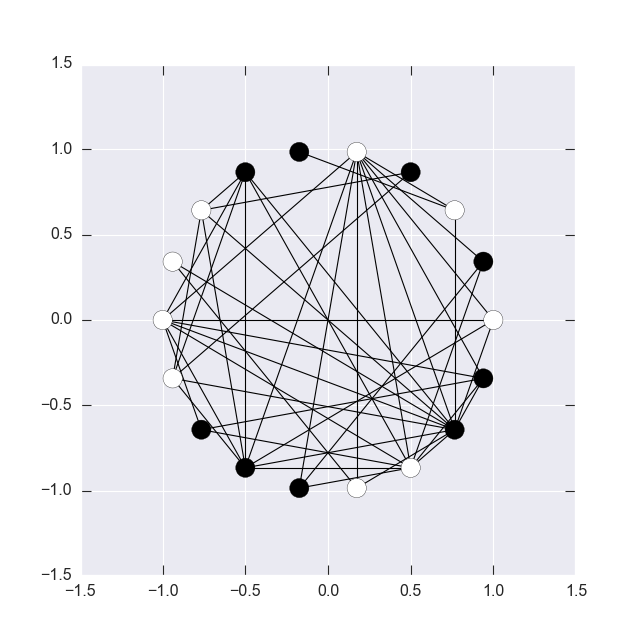

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

plt.ion()
G=nx.read_gpickle("../../data/airport/smaller_airportnet.pickle")

#Create random initial infection
src=np.random.choice(G.nodes())

for n in G.nodes():
    G.node[n]['conc']=0
G.node[src]['conc']=1

#Create figure
fig = plt.figure(figsize=(8,8))
pos=nx.circular_layout(G)

allnodes=G.nodes()


nodes = nx.draw_networkx_nodes(G,pos,node_color=[G.node[n]['conc'] for n in G.nodes()])
edges = nx.draw_networkx_edges(G,pos) 




def spread_infection(*args):
    conc2={n:0 for n in G.nodes()}
    degs=G.degree()
    for node in G.nodes():
        oldconc=G.node[node]['conc']
        conc2[node]-=oldconc*degs[node]/(degs[node]+1)
        for nei in G.neighbors(node):
            conc2[nei]+=oldconc/(degs[node]+1)
    for n in G.nodes():
        G.node[n]['conc']=conc2[n]
    nodes.set_array(np.array([G.node[n]['conc'] for n in G.nodes()]))
    return nodes,
        

anim = FuncAnimation(fig, spread_infection, interval=100, blit=True)